In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay

In [2]:
tss = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_clusterall.csv")
tss_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_clusterall_cv.csv")
tss1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cluster1.csv")
tss2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cluster2.csv")
tss3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cluster3.csv")

In [3]:
csi = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_clusterall.csv")
csi_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_clusterall_cv.csv")
csi1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cluster1.csv")
csi2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cluster2.csv")
csi3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cluster3.csv")

In [4]:
tss_thresh = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_clusterall.csv")
tss_thresh_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_clusterall_cv.csv")
tss_thresh1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_cluster1.csv")
tss_thresh2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_cluster2.csv")
tss_thresh3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_cluster3.csv")

In [5]:
csi_thresh = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_clusterall.csv")
csi_thresh_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_clusterall_cv.csv")
csi_thresh1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_cluster1.csv")
csi_thresh2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_cluster2.csv")
csi_thresh3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_cluster3.csv")

In [6]:
tss = tss.merge(tss_cv.rename(columns={"bdsd":"bdsd_cv"})["bdsd_cv"],right_index=True,left_index=True)
csi = csi.merge(csi_cv.rename(columns={"bdsd":"bdsd_cv"})["bdsd_cv"],right_index=True,left_index=True)

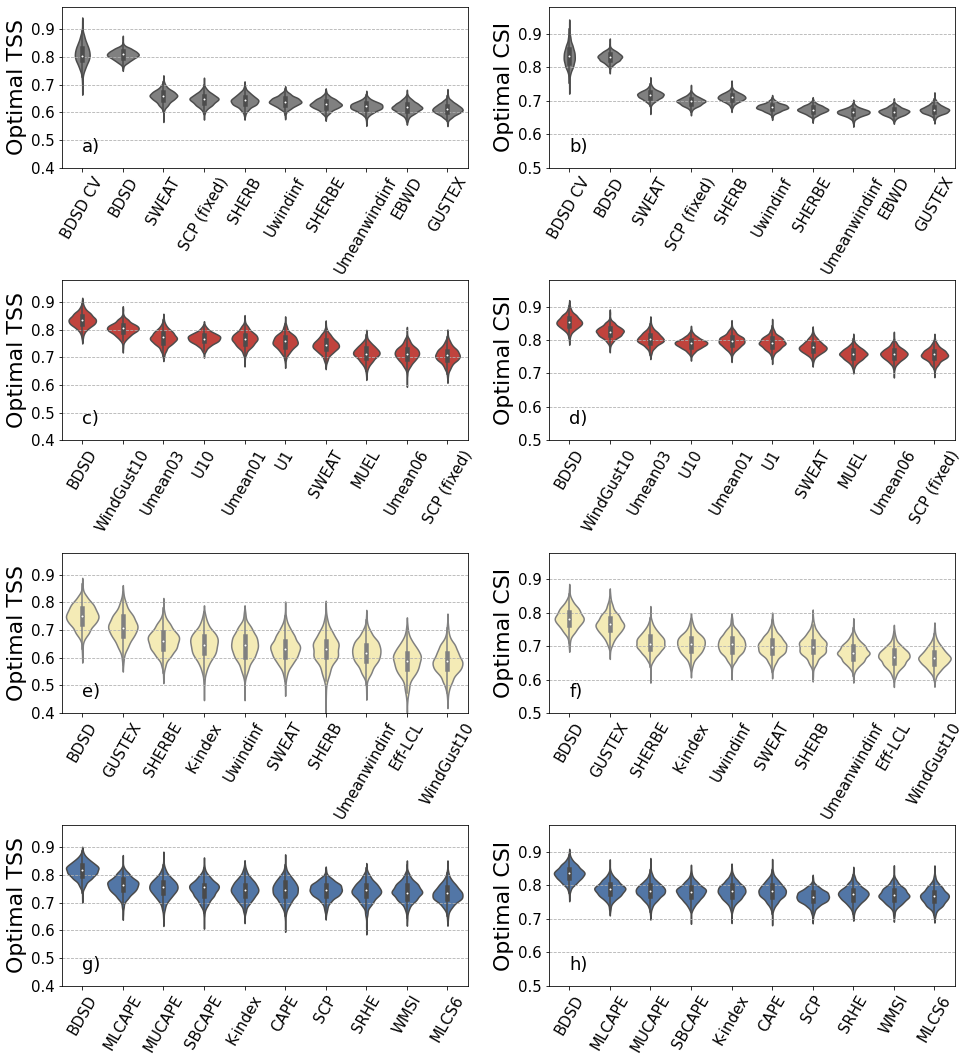

In [7]:
renames = {"ship":"SHIP", "k_index":"K-index", "ml_cape":"MLCAPE", "srhe_left":"SRHE", \
         "ml_el":"MLEL", "mu_cape":"MUCAPE", "eff_cape":"Eff-CAPE", "sb_cape":"SBCAPE", "eff_lcl":"Eff-LCL",\
         "wmsi_ml":"WMSI", "dcp":"DCP", "mlcape*s06":"MLCS6", "eff_sherb":"SHERBE", "ebwd":"EBWD",\
         "mu_el":"MUEL", "eff_el":"Eff-EL", "sb_el":"SBEL", "mucape*s06":"MUCS6", "sweat":"SWEAT",\
         "Umean800_600":"Umean800-600", "Ust_left":"Ust", "sherb":"SHERB", "t_totals":"T-totals", \
         "scp_fixed":"SCP (fixed)","scp":"SCP", "dmgwind_fixed":"DmgWind-Fixed", "lr36":"LR36", "lr_freezing":"LR-Freezing", \
         "srh06_left":"SRH06", "s06":"S06", "wg10":"WindGust10", "srh01_left":"SRH01",\
         "qmeansubcloud":"Qmeansubcloud", "s010":"S010", "effcape*s06":"Eff-CS6", "mmp":"MMP",\
         "sbcape*s06":"SBCS6", "q_melting":"Qmelting", "gustex":"GUSTEX", "pwat":"PWAT",\
         "qmean06":"Qmean06","q3":"Q3","qmean03":"Qmean03","s03":"S03",\
         "convgust_dry":"ConvGust-Dry","cp":"ConvPrcp","dpd700":"DPD700","Umeanwindinf":"Umeanwindinf",\
         "v_totals":"V-Totals","c_totals":"C-Totals","qmean01":"Qmean01","mhgt":"MHGT",\
         "wbz":"WBZ","sfc_thetae":"Sfc-ThetaE","q1":"Q1","te_diff":"TED","rhmin13":"RHMin03","Uwindinf":"Uwindinf",\
        "Umean06":"Umean06","U3":"U3","U500":"U500","U6":"U6","Umean03":"Umean03","U1":"U1",\
          "bdsd":"BDSD","bdsd_cv":"BDSD CV","mod_cape*s06":"CS6","mod_cape":"CAPE"}

sort = tss.mean(axis=0).sort_values(ascending=False).index.values[0:10]
sort1 = tss1.mean(axis=0).sort_values(ascending=False).index.values[0:10]
sort2 = tss2.mean(axis=0).sort_values(ascending=False).index.values[0:10]
sort3 = tss3.mean(axis=0).sort_values(ascending=False).index.values[0:10]

p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

def plot(data, ax, color, y1, renames, ylabel, letter):
    sns.violinplot(data=data.rename(columns=renames),color=color)
    plt.gca().tick_params(axis="x",labelrotation=60)
    plt.ylim([y1,0.98])
    plt.gca().tick_params(labelsize=15)
    plt.ylabel(ylabel,size=22)
    plt.yticks(np.arange(y1,1,0.1))
    plt.xlabel("")
    plt.gca().grid(axis="y",ls="--")
    ax.text(0.05,0.1,letter+")",transform=ax.transAxes,size=18)
    
    
plt.figure(figsize=[16,18])
plot(tss.loc[:,sort], plt.subplot(4,2,1),(0.5,0.5,0.5),0.4,renames,"Optimal TSS","a")
plot(tss1.loc[:,sort1], plt.subplot(4,2,3),p[0],0.4,renames,"Optimal TSS","c")
plot(tss2.loc[:,sort2], plt.subplot(4,2,5),p[1],0.4,renames,"Optimal TSS","e")
plot(tss3.loc[:,sort3], plt.subplot(4,2,7),p[2],0.4,renames,"Optimal TSS","g")
plot(csi.loc[:,sort], plt.subplot(4,2,2),(0.5,0.5,0.5),0.5,renames,"Optimal CSI","b")
plot(csi1.loc[:,sort1], plt.subplot(4,2,4),p[0],0.5,renames,"Optimal CSI","d")
plot(csi2.loc[:,sort2], plt.subplot(4,2,6),p[1],0.5,renames,"Optimal CSI","f")
plot(csi3.loc[:,sort3], plt.subplot(4,2,8),p[2],0.5,renames,"Optimal CSI","h")

plt.subplots_adjust(hspace=0.7)

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/skill.jpeg",bbox_inches="tight",dpi=500)

In [8]:
def load_scws(rid):
    print("loading "+rid+"...")
    df1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_scw_envs_df.csv")
    df2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_non_scw_envs_df.csv")
    df1["rid"]=rid
    df2["rid"]=rid
    df1["scw"]=1
    df2["scw"]=0
    return df1, df2

#Load SCW/null information (hourly)
melb_scw, melb_null = load_scws("2")
bris_scw, bris_null = load_scws("66")
namoi_scw, namoi_null = load_scws("69")
perth_scw, perth_null = load_scws("70")
syd_scw, syd_null = load_scws("71")
df_scw = pd.concat([melb_scw, bris_scw, namoi_scw, perth_scw, syd_scw], axis=0)
df_null = pd.concat([melb_null, bris_null, namoi_null, perth_null, syd_null], axis=0)

loading 2...
loading 66...
loading 69...
loading 70...
loading 71...


In [9]:
df_scw1 = df_scw.query("cluster==0")
df_scw2 = df_scw.query("cluster==2")
df_scw3 = df_scw.query("cluster==1")
df_null1 = df_null.query("cluster==0")
df_null2 = df_null.query("cluster==2")
df_null3 = df_null.query("cluster==1")

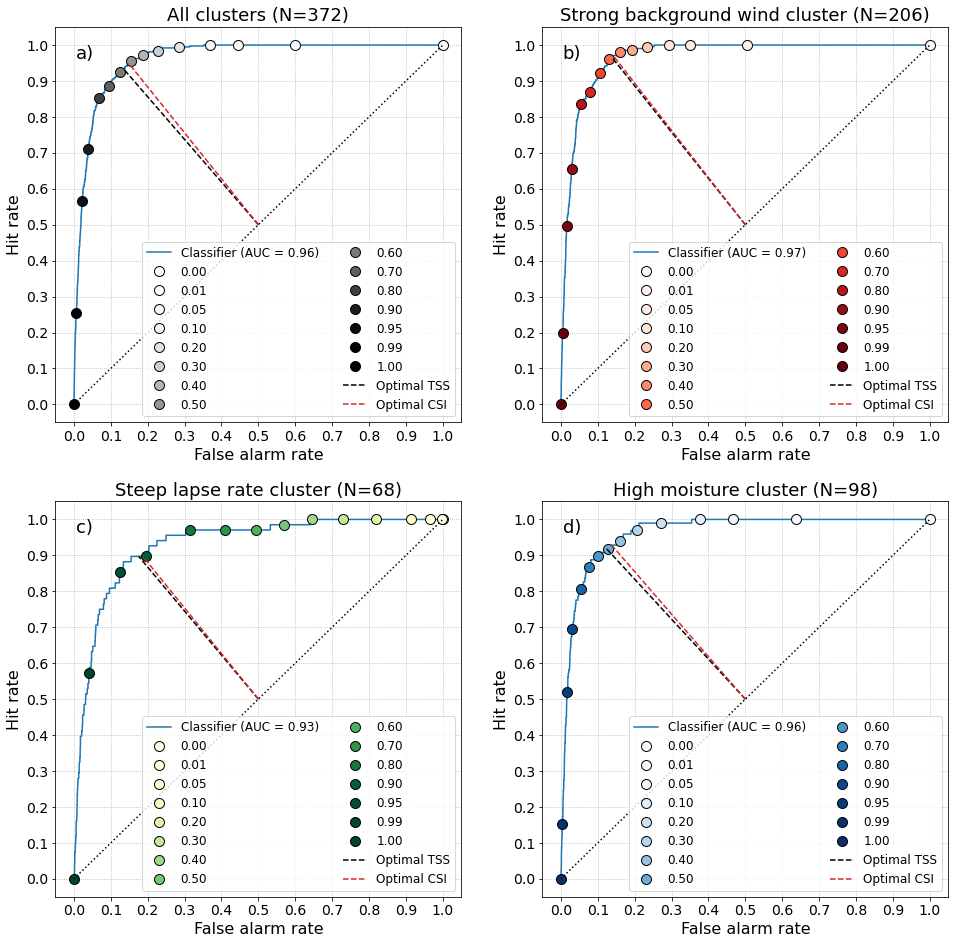

In [10]:
def interp_roc(x, fpr, tpr, thresholds):
    return np.interp(x, np.flip(thresholds), np.flip(fpr)), np.interp(x, np.flip(thresholds), np.flip(tpr))

def plot_roc(ax, df, opt_tss, opt_csi, cmap, letter):

    RocCurveDisplay.from_predictions(df["scw"],df["bdsd"],ax=ax)
    fpr, tpr, thresholds = roc_curve(df["scw"],df["bdsd"])
    for t in [0.0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1.0]:
        x, y = interp_roc(t, fpr, tpr, thresholds)
        ax.plot(x, y, marker="o",label='%.2f' % (t), color=cmap(t), mec="k", ls="none", ms=10)
    opt_tss_x, opt_tss_y = interp_roc(opt_tss, fpr, tpr, thresholds)
    ax.plot([0.5,opt_tss_x], [0.5,opt_tss_y], color="k", ls="--", label="Optimal TSS")
    opt_csi_x, opt_csi_y = interp_roc(opt_csi, fpr, tpr, thresholds)
    ax.plot([0.5,opt_csi_x], [0.5,opt_csi_y], color="tab:red", ls="--",label="Optimal CSI")         
    plt.legend(fontsize=12,ncol=2)
    ax.plot([0,1],[0,1],color="k",ls=":")
    ax.grid(ls=":")
    ax.set_ylabel("Hit rate",size=16)
    ax.set_xlabel("False alarm rate",size=16)
    ax.tick_params("both",labelsize=14)
    ax.set_xticks(np.arange(0,1.1,.1))
    ax.set_yticks(np.arange(0,1.1,.1)) 
    ax.text(0.05,0.92,letter+")",size=18,transform=ax.transAxes)
    
    
plt.figure(figsize=[16,16])

plot_roc(plt.subplot(2,2,1),
         pd.concat([df_scw[["bdsd","scw"]], 
                    df_null[["bdsd","scw"]]],axis=0),
         tss_thresh.bdsd.mean(),
         csi_thresh.bdsd.mean(),
         plt.get_cmap("Greys"),"a")
plt.title("All clusters (N=372)",size=18)

plot_roc(plt.subplot(2,2,2), 
         pd.concat([df_scw1[["bdsd","scw"]], 
                    df_null1[["bdsd","scw"]]],axis=0),
         tss_thresh1.bdsd.mean(),
         csi_thresh1.bdsd.mean(),
         plt.get_cmap("Reds"),"b")
plt.title("Strong background wind cluster (N=206)",size=18)

plot_roc(plt.subplot(2,2,3),
         pd.concat([df_scw2[["bdsd","scw"]], 
                    df_null2[["bdsd","scw"]]],axis=0),
         tss_thresh2.bdsd.mean(),
         csi_thresh2.bdsd.mean(),
         plt.get_cmap("YlGn"),"c")
plt.title("Steep lapse rate cluster (N=68)",size=18)

plot_roc(plt.subplot(2,2,4),
         pd.concat([df_scw3[["bdsd","scw"]],
                    df_null3[["bdsd","scw"]]],axis=0),
         tss_thresh3.bdsd.mean(),
         csi_thresh3.bdsd.mean(),
         plt.get_cmap("Blues"),"d")
plt.title("High moisture cluster (N=98)",size=18)

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/skill_roc.jpeg",bbox_inches="tight",dpi=500)

In [13]:
df=pd.concat([df_scw[["bdsd","scw"]], df_null[["bdsd","scw"]]],axis=0)
fpr, tpr, thresholds = roc_curve(df["scw"],df["bdsd"])

for t, note in zip((0.57,0.83,0.915),("Optimal","Brown and Dowdy 2021","Two-thirds POD")):

    x, y = interp_roc(t, fpr, tpr, thresholds)
    print(note,": ","FAR=",x,"POD=",y)

Optimal :  FAR= 0.13277920475569213 POD= 0.9301075268817204
Brown and Dowdy 2021 :  FAR= 0.05967513307595825 POD= 0.8279569892473119
Two-thirds POD :  FAR= 0.03435142772373492 POD= 0.6666666666666666
